# Task 1: 

### Calculate and print the square root of 2 to 100 decimal places

### Must not depend on and module from the standard library

In [222]:
# Python automatically prints to a maxiumum of 16 digits
# Created a basic squareRoot function so this can be applied to any number
def squareRoot(x):
    result = x ** (0.5)
    return result

In [223]:
squareRoot(2)

1.4142135623730951

In [224]:
# This can be extended using the format function
# However this eventually leads to 0s being repeated and thus does not accurately print the result
result = 2 ** (1/2.0)

print(format(result,'.100f'))

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


### The best way to do this USING modules is through the Decimal module

Docs.python.org. 2020. Decimal — Decimal Fixed Point And Floating Point Arithmetic — Python 3.9.0 Documentation. [online] Available at: <https://docs.python.org/3/library/decimal.html> [Accessed 10 November 2020]. 

In [225]:
# This will print out to 100 decimal places however doesn't comply with the tasks requirements
getcontext().prec = 100
result = Decimal(2).sqrt()
print(result)

NameError: name 'getcontext' is not defined

## By converting the number to an integer we can print more digits than possible via the print function

We see this in the python documentation

Docs.python.org. 2020. Decimal — Decimal Fixed Point And Floating Point Arithmetic — Python 3.9.0 Documentation. [online]
Available at: <https://docs.python.org/3/library/decimal.html> [Accessed 10 November 2020].


In [226]:
format((squareRoot(2) * 10 ** 100),'100f')

'14142135623730952214093017858547657902953555641438782124185842940740828094528952769132495248707026944.000000'

## Putting it altogether as a complete function prints the square of X to 100 digits

In [227]:
def squareRootNew(x):
    result = (x ** (0.5)) * 10 ** 100
    return result 

In [228]:
squareRootNew(2)

1.4142135623730952e+100

# Task 2: 

### Use scipy.stats to verify the Chi Squared value of 24.6

### Calculate it's associated p Value

####                       A      B      C      D      Total
#### White collar 90    60   104    95       349
#### Blue collar   30    50    51     20       151
#### No collar      30    40    45     35       150
#### Total             150 150  200   150      650


To test for independence in a chi square we need to use chi_contingency

"SciPy’s chi2_contingency() returns four values, 𝜒2 value, p-value, degree of freedom and expected values."

Okada, S., 2020. Gentle Introduction to Chi-Square Test for Independence. Medium. Available at: https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95 [Accessed November 15, 2020]. 

Anon, Statistics (scipy.stats)¶. Statistics (scipy.stats) - SciPy v1.5.4 Reference Guide. Available at: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html [Accessed November 15, 2020]. 

Anon, scipy.stats.chi2_contingency¶. scipy.stats.chi2_contingency - SciPy v1.5.4 Reference Guide. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html [Accessed November 15, 2020]. 

In [229]:
from scipy import stats

chiSquareTable  = [[90,60,104,95],[30,50,51,20],[30,40,45,35]]         

# chi = chi value(expected to be 24.6)
# p = associated p value
# these values along with dof(degree of freedom) and expected(expected frequencies based on the sums of the table) 
# can be called from the chi2_contingency function and don't need to be declared
# we dont need the dof and expected values so only pvalue and chi2 is printed

chi2,p,dof,expected = chi2_contingency(chiSquareTable)
print(f"Degrees of freedom: {dof}")
print(f"Chi 2 statistic: {chi2:.1f}")
print(f"P-value: {p:.5f}")

NameError: name 'chi2_contingency' is not defined

# Task 3: 

### Explain the Excel Function STDEV.P and STDEV.S


### Use Numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

Standard Deviation is a statistical measure that is used to identify the amount that a set of values differ/deviate from it's average value

Both STDEV.P and STDEV.S both are used to calculate the Standard Deviation of a set of values.


With STDEV.P function this is used on a set of values however when the data set is a *Sample* of a population(rather than an entire population) a modified version of the STDEV is used which is STDEV.S

## The formula used in numpy to calculate the standard deviation STDEV.P is:
### np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

## The modified formula to calculate the standard deviation using numpy for a sample(STDEV.S) is which is:
### np.sqrt(np.sum((x - np.mean(x))**2)/len(x) - 1)

### In Summary:
While both STDEV.P and STDEV.S are used to calculate the Standard Deviation in Excel.

STDEV.P is used for normal standard deviation of a population/set of values

STDEV.S is used for standard deviation of a *Sample* of a population/set of values

Excelfunctions.net. 2020. Excel STDEV.P Function. [online] Available at: <https://www.excelfunctions.net/excel-stdev-p-function.html> [Accessed 3 December 2020].

Excelfunctions.net. 2020. Excel STDEV.S Function. [online] Available at: <https://www.excelfunctions.net/excel-stdev-s-function.html> [Accessed 3 December 2020].

## STDEV.S and STDEV.P Numpy
Simulation coding is the process of using a set of mathematical formulas to demonstrate what an operation would do without actually performing it . It is used to simulate events without hard coding/calculating it individually.

To simualte this data we are going to use numpy and matlabs to plot 
To make this more readable ill be

In [230]:
import numpy as np
%matplotlib inline
# Create 50 random numbers
# We use numpy.random.standard_normal as it fits many natural phenomena such as blood pressure,heights and IQ scores.
# This allows us to make a more realistic set of data

Numpy.org. 2020. Numpy.Random.Standard_Normal — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html> [Accessed 3 December 2020].

In [231]:
# We need to create a ratio calculator in order to compare the two standard deviations
def compareStandardDeviations(num1, num2):
    ratio = (num1/num2)
    print(f'\nThe ratio of the two standard deviations is: {ratio}')

In [232]:
# In order to verify whether STDEV.S is more reliable than STDEV.P when performed on a sample
# We will simulate random sets of data and inspect both functions on this data set

for x in range(9):
    sampleNumbs = np.random.standard_normal(10)
    data = sampleNumbs[:10]
    populationDev = np.sqrt(np.sum((data - np.mean(data))**2)/len(data))
    sampleDev = np.sqrt(np.sum((data - np.mean(data))**2)/(len(data)-1))
    print(f'\nPopulation Standard Deviation:     {populationDev}.')
    print(f'Sample Standard Deviation:         {sampleDev}.')
    compareStandardDeviations(sampleDev,populationDev)


Population Standard Deviation:     1.1136002816226451.
Sample Standard Deviation:         1.1738377643108353.

The ratio of the two standard deviations is: 1.0540925533894596

Population Standard Deviation:     0.842295452257417.
Sample Standard Deviation:         0.8878573639783505.

The ratio of the two standard deviations is: 1.0540925533894598

Population Standard Deviation:     1.220073993148511.
Sample Standard Deviation:         1.286070910761988.

The ratio of the two standard deviations is: 1.0540925533894596

Population Standard Deviation:     1.111944113033655.
Sample Standard Deviation:         1.1720920093340235.

The ratio of the two standard deviations is: 1.0540925533894598

Population Standard Deviation:     0.9223616529127349.
Sample Standard Deviation:         0.9722545498673073.

The ratio of the two standard deviations is: 1.0540925533894598

Population Standard Deviation:     0.6917826260067224.
Sample Standard Deviation:         0.7292029146378917.

The ratio of

#### From the data above we can see that when compared, the two standard deviations are very similar with a ratio that is close to 1 indicating how similar they are in value. A sample of the population allows us to generalise a population without having to gather more data. This allows us to make estimates and guesses without the need for additional data therefore making the STDEV.S function much more practical for large data amounts which is beneficial for research as it requires less data and produces similar results

# Task 4: 

### Use scikit-learn to apply k-means clustering to Fisher's famous Iris Data Set

### Explain how the code works, how accurate it is and how it's used to make predictions of species of iris



The Fishers Iris Data Set is a famous dataset containing 50 samples of 3 different species of the Iris flower.
It contains 150 total samples

ritchieng.github.io. 2020. Iris Dataset. [online] Available at: <https://www.ritchieng.com/machine-learning-iris-dataset/> [Accessed 5 December 2020].

Scikit-learn.org. 2020. The Iris Dataset — Scikit-Learn 0.24.0 Documentation. [online] Available at: <https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html> [Accessed 5 December 2020].

The goal of this task is to apply k-means clustering to Fishers Iris data set

Scikit-learn.org. 2020. Sklearn.Cluster.Kmeans — Scikit-Learn 0.24.0 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html> [Accessed 5 December 2020].

The objective of K-means clustering is to group similar data points together and discover underlying patterns.
To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

"Kmeans clustering is a method that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster."

Medium. 2020. Understanding K-Means Clustering In Machine Learning. [online] Available at: <https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1> [Accessed 5 December 2020].

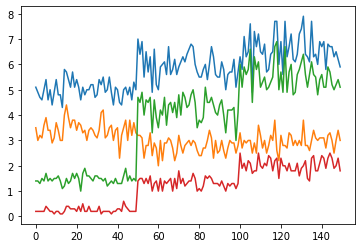

In [233]:
# Import sklearn KMeans and Datasets aswell as numpy and matplotlib
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
# This is used for plotting data using colour on a plot
from sklearn.decomposition import PCA
# load Fishers iris data set to X
iris = datasets.load_iris()
X = iris.data
# 3 clusters as there's 3 different species
kmeans = KMeans(n_clusters=3)
# Fits the data which allows it to be worked upon
kmeans.fit
plt.plot(X)

#### We will now plot the three species on both a 2D and 3D plot to accurately see the data/centroids of the data

MachineCurve. 2020. How To Perform K-Means Clustering With Python In Scikit? – Machinecurve. [online] Available at: <https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/#what-is-k-means-clustering> [Accessed 5 December 2020].

Matplotlib.org. 2020. 3D Scatterplot — Matplotlib 3.1.2 Documentation. [online] Available at: <https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html> [Accessed 5 December 2020].

Matplotlib.org. 2020. Matplotlib.Pyplot.Yticks — Matplotlib 3.3.3 Documentation. [online] Available at: <https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html#matplotlib.pyplot.yticks> [Accessed 5 December 2020].

# Here we display the species data on a 2D Plot






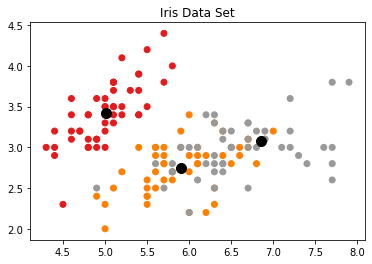

In [234]:
# This scatters the data over a plot and differentiates it usig colour
plt.scatter(X[:,0], X[:,1], marker="o", picker=True,c=y, cmap=plt.cm.Set1,)
kmeans.fit(X)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);
plt.title('Iris Data Set')     
plt.show()
# Here we plotted the centroids of each species

# Here we display the species data on a 3D plot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

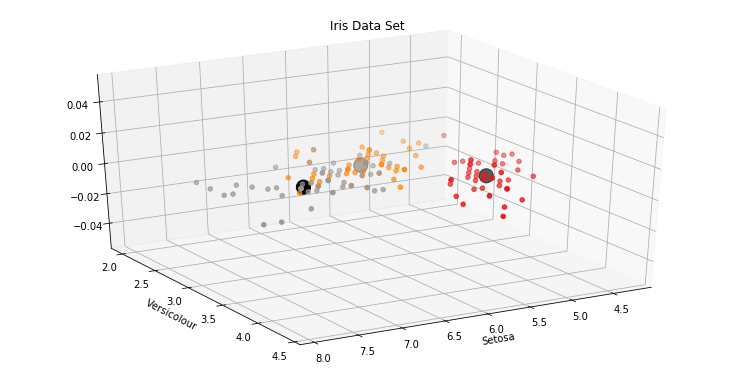

In [235]:
# plot size
fig = plt.figure(1, figsize=(10, 5))
# elev and azim means the angle in which we view it
ax = Axes3D(fig, elev=30, azim=60)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
# scatter data across 3d axis 
ax.scatter(X[:,0], X[:,1], marker="o", c=y, cmap=plt.cm.Set1,)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
ax.set_title("Iris Data Set")
ax.set_xlabel("Setosa")
ax.set_ylabel("Versicolour")
plt.plot

## Using KMeans to predict species of Iris

In [236]:
kmeans.fit(X)
# fit must be called first before predict can be called
newData = kmeans.predict(X)
newData

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

The code above creates an array the same size of X
This array uses the iris data to predict the distribution of the three iris species.
0,1,2 all represent a different Iris species
It uses the X data to predict these numbers
